In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np
import sys
import astropy.units as u
from astropy.io import ascii, fits
from astropy.modeling.blackbody import blackbody_lambda

sys.path.insert(0, '../')
from libra import Spot, Star

In [2]:
from astropy.io import fits
from glob import glob

paths = glob('/Users/bmmorris/git/freckles/data/lte*BT-Settl.spec.fits')

wavelengths = fits.getdata(paths[0])['Wavelength']

temperatures = []
model_fluxes = []

for path in paths:
    hdu = fits.open(path)
    temperatures.append(hdu[1].header['PHXTEFF'])
    interp_flux = np.interp(wavelengths, hdu[1].data['Wavelength'], hdu[1].data['Flux'])
    model_fluxes.append(interp_flux)
    
model_fluxes = np.vstack(model_fluxes)
temperatures = np.array(temperatures)

In [5]:
trappist1 = model_fluxes[np.argmin(np.abs(temperatures - 2500))] * wavelengths
spots = model_fluxes[np.argmin(np.abs(temperatures - 3636))] * wavelengths

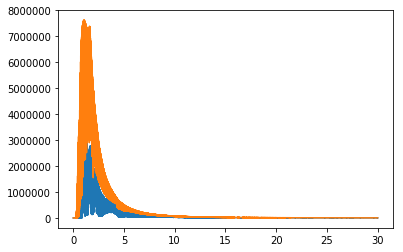

In [6]:
plt.plot(wavelengths, trappist1)
plt.plot(wavelengths, spots)

In [7]:
spot_fractional_area = np.pi * 0.02071754**2 / (4 * np.pi)

combined_spectrum = (1 - spot_fractional_area) * trappist1 + spot_fractional_area * spots

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/Users/bmmorris/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


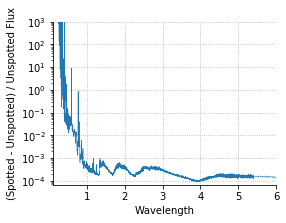

In [30]:
from scipy.ndimage import gaussian_filter1d

fig, ax = plt.subplots(figsize=(4, 3))
ax.semilogy(wavelengths, gaussian_filter1d((combined_spectrum - trappist1)/trappist1, 100), lw=0.5)
ax.set_xlim([0.1, 6])
ax.set_ylim([0, 1e3])
ax.grid(ls=':')
ax.set_xlabel('Wavelength')
ax.set_ylabel('(Spotted - Unspotted) / Unspotted Flux')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.savefig('wavelength_dependence.pdf', bbox_inches='tight')

In [ ]:
from astropy.modeling.blackbody import blackbody_lambda

vega = blackbody_lambda(wavelengths*u.um, 9700)

(1e-20, 100000000.0)

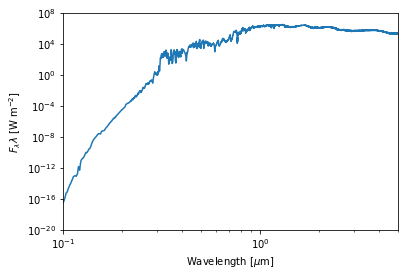

In [37]:
plt.loglog(wavelengths, gaussian_filter1d(combined_spectrum, 100))
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('$F_\lambda \lambda$ [W m$^{-2}$]')
plt.xlim([0.1, 5])
plt.ylim([1e-20, 1e8])